In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = {
    "Year": [2019, 2020, 2021, 2022, 2023],
    "Revenue": [1000, 950, 1100, 1300, 1500],          # in £m
    "COGS": [600, 580, 650, 770, 900],                 # cost of goods sold
    "OperatingIncome": [200, 150, 210, 260, 300],      # EBIT
    "NetIncome": [120, 80, 140, 170, 190],             # profit after tax
    "TotalAssets": [2000, 2100, 2200, 2300, 2500],
    "TotalEquity": [1000, 1020, 1040, 1070, 1100],
    "TotalDebt": [600, 650, 700, 720, 800],
    "CFO": [150, 130, 160, 190, 200],                  # cash flow from operations
    "Capex": [80, 70, 75, 90, 95],                     # capital expenditure
}

fin = pd.DataFrame(data).set_index("Year")
fin


,Revenue,COGS,OperatingIncome,NetIncome,TotalAssets,TotalEquity,TotalDebt,CFO,Capex
Year,,,,,,,,,
2019,1000,600,200,120,2000,1000,600,150,80
2020,950,580,150,80,2100,1020,650,130,70
2021,1100,650,210,140,2200,1040,700,160,75
2022,1300,770,260,170,2300,1070,720,190,90
2023,1500,900,300,190,2500,1100,800,200,95


In [3]:
def add_kpis(fin_df: pd.DataFrame) -> pd.DataFrame:
    df = fin_df.copy()

    # Revenue growth (%)
    df["RevenueGrowthPct"] = df["Revenue"].pct_change() * 100

    # Gross profit and margin
    df["GrossProfit"] = df["Revenue"] - df["COGS"]
    df["GrossMarginPct"] = df["GrossProfit"] / df["Revenue"] * 100

    # Operating margin
    df["OperatingMarginPct"] = df["OperatingIncome"] / df["Revenue"] * 100

    # Net margin
    df["NetMarginPct"] = df["NetIncome"] / df["Revenue"] * 100

    # ROA and ROE
    df["ROA_Pct"] = df["NetIncome"] / df["TotalAssets"] * 100
    df["ROE_Pct"] = df["NetIncome"] / df["TotalEquity"] * 100

    # Leverage
    df["DebtToEquity"] = df["TotalDebt"] / df["TotalEquity"]

    # Cash conversion (earnings to cash)
    df["CashConversionPct"] = df["CFO"] / df["NetIncome"] * 100

    # Capex intensity
    df["CapexToRevenuePct"] = df["Capex"] / df["Revenue"] * 100

    return df

fin_kpis = add_kpis(fin)
fin_kpis.round(2)


,Revenue,COGS,OperatingIncome,NetIncome,TotalAssets,TotalEquity,TotalDebt,CFO,Capex,RevenueGrowthPct,GrossProfit,GrossMarginPct,OperatingMarginPct,NetMarginPct,ROA_Pct,ROE_Pct,DebtToEquity,CashConversionPct,CapexToRevenuePct
Year,,,,,,,,,,,,,,,,,,,
2019,1000,600,200,120,2000,1000,600,150,80,NaN,400,40.00,20.00,12.00,6.00,12.00,0.60,125.00,8.00
2020,950,580,150,80,2100,1020,650,130,70,-5.00,370,38.95,15.79,8.42,3.81,7.84,0.64,162.50,7.37
2021,1100,650,210,140,2200,1040,700,160,75,15.79,450,40.91,19.09,12.73,6.36,13.46,0.67,114.29,6.82
2022,1300,770,260,170,2300,1070,720,190,90,18.18,530,40.77,20.00,13.08,7.39,15.89,0.67,111.76,6.92
2023,1500,900,300,190,2500,1100,800,200,95,15.38,600,40.00,20.00,12.67,7.60,17.27,0.73,105.26,6.33


In [4]:
def equity_snapshot(company_name: str, fin_df: pd.DataFrame) -> str:
    df = add_kpis(fin_df)
    latest_year = df.index.max()
    row = df.loc[latest_year]

    # Extract metrics
    rev = row["Revenue"]
    rev_growth = row["RevenueGrowthPct"]
    gross_margin = row["GrossMarginPct"]
    op_margin = row["OperatingMarginPct"]
    net_margin = row["NetMarginPct"]
    roa = row["ROA_Pct"]
    roe = row["ROE_Pct"]
    d_e = row["DebtToEquity"]
    cash_conv = row["CashConversionPct"]
    capex_intensity = row["CapexToRevenuePct"]

    snapshot = f"""
{company_name} – Equity Snapshot (Year {latest_year})

Scale and growth:
- Revenue: £{rev:.1f}m
- Revenue growth vs prior year: {rev_growth:.1f}%

Profitability:
- Gross margin: {gross_margin:.1f}%
- Operating margin: {op_margin:.1f}%
- Net margin: {net_margin:.1f}%

Returns:
- Return on Assets (ROA): {roa:.1f}%
- Return on Equity (ROE): {roe:.1f}%

Balance sheet and leverage:
- Total Assets: £{row['TotalAssets']:.1f}m
- Total Equity: £{row['TotalEquity']:.1f}m
- Total Debt: £{row['TotalDebt']:.1f}m
- Debt-to-Equity ratio: {d_e:.2f}x

Cash and investment:
- Cash conversion (CFO / Net income): {cash_conv:.1f}%
- Capex intensity (Capex / Revenue): {capex_intensity:.1f}%

Interpretation (basic structure):
- Revenue growth and margins tell you about the strength and quality of the business model.
- ROA/ROE show how effectively the company uses its assets and equity base to generate profit.
- Debt-to-equity indicates balance sheet risk and financial leverage.
- Cash conversion and capex intensity help you judge how much of earnings are actually turning into cash,
  and how much is being reinvested back into the business.

Next steps:
- Compare these metrics to previous years (trend analysis).
- Compare to peers in the same sector.
- Combine with macro context (e.g. how rising rates affect a leveraged company).
"""

    return snapshot


In [5]:
print(equity_snapshot("SampleCo plc", fin))



SampleCo plc – Equity Snapshot (Year 2023)

Scale and growth:
- Revenue: £1500.0m
- Revenue growth vs prior year: 15.4%

Profitability:
- Gross margin: 40.0%
- Operating margin: 20.0%
- Net margin: 12.7%

Returns:
- Return on Assets (ROA): 7.6%
- Return on Equity (ROE): 17.3%

Balance sheet and leverage:
- Total Assets: £2500.0m
- Total Equity: £1100.0m
- Total Debt: £800.0m
- Debt-to-Equity ratio: 0.73x

Cash and investment:
- Cash conversion (CFO / Net income): 105.3%
- Capex intensity (Capex / Revenue): 6.3%

Interpretation (basic structure):
- Revenue growth and margins tell you about the strength and quality of the business model.
- ROA/ROE show how effectively the company uses its assets and equity base to generate profit.
- Debt-to-equity indicates balance sheet risk and financial leverage.
- Cash conversion and capex intensity help you judge how much of earnings are actually turning into cash,
  and how much is being reinvested back into the business.

Next steps:
- Compare th

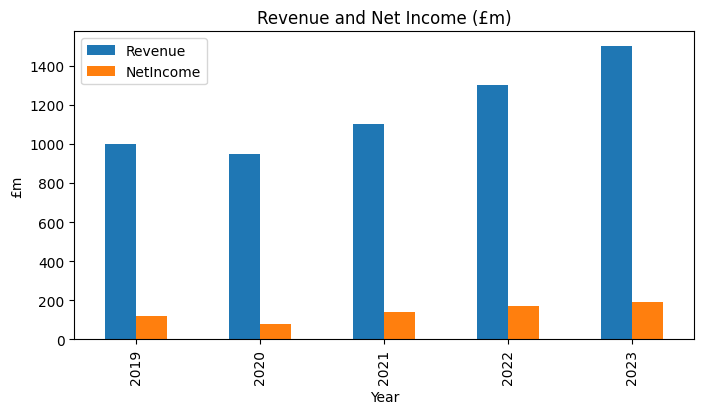

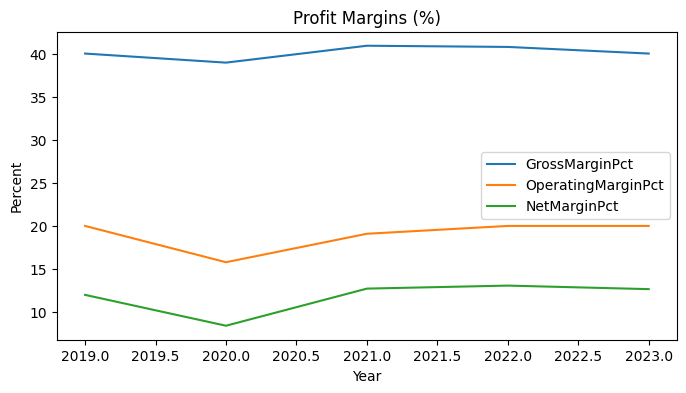

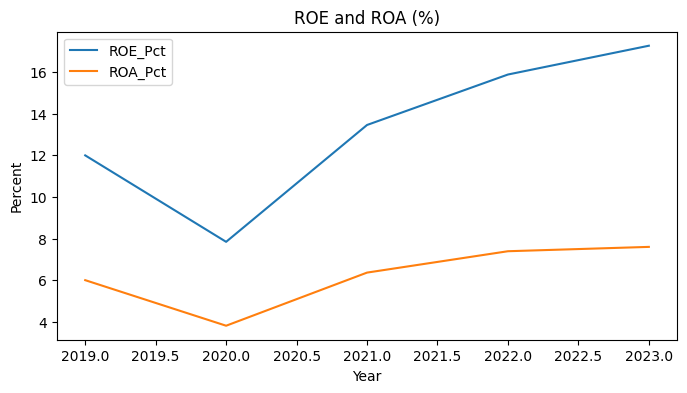

In [6]:
fin_kpis = add_kpis(fin)

# Revenue and net income
fin_kpis[["Revenue", "NetIncome"]].plot(kind="bar", figsize=(8, 4), title="Revenue and Net Income (£m)")
plt.ylabel("£m")
plt.show()

# Margins
fin_kpis[["GrossMarginPct", "OperatingMarginPct", "NetMarginPct"]].plot(figsize=(8, 4), title="Profit Margins (%)")
plt.ylabel("Percent")
plt.show()

# ROE and ROA
fin_kpis[["ROE_Pct", "ROA_Pct"]].plot(figsize=(8, 4), title="ROE and ROA (%)")
plt.ylabel("Percent")
plt.show()
